# 과제
아래 가이드에 따라 고객별 연간 구매데이터를 생성하고 아래사항을 수행하기(관측치 1,000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

거래 번호
- id : 1 ~ 1000번 일련번호 - 개시 후 1천 건의 거래가 있었고 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 1000개 랜덤(1,000명의 고객데이터가 있는 것)
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- (date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성)
- (day : 요일)
- (time_20 : 01 ~ 24 사이 정수 난수 생성)
- (time_21 : 01 ~ 24 사이 정수 난수 생성)
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0



## 컨셉: 쿠팡 구매데이터

## 1. 랜덤 데이터 생성

In [716]:
import pandas as pd
import numpy as np
import random
from datetime import datetime 
import time

### 고객 속성 데이터프레임 만들기

In [717]:
random.seed(1)

#고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001)
#cusno=random.sample(list(range(1000,9000)),1000)
gender=np.random.choice([0,1],size=1000)
age=np.random.randint(10,70,size=1000)
region=np.random.randint(1,11,size=1000)  

In [718]:
#배열-> 시리즈
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
region=pd.Series(region)

#데이터프레임 만들기
customer=pd.concat([cusno,gender,age,region],axis=1)

#컬럼명 지정
customer.columns=['cusno','gender','age','region']

customer.head()

,cusno,gender,age,region
0,1001,1,25,6
1,1002,1,15,8
2,1003,1,27,9
3,1004,0,35,5
4,1005,1,40,9


### 거래 데이터프레임 만들기

In [719]:
#빈 데이터프레임 만들기
purchase=pd.DataFrame(columns=['id','cusno','product','price','quantity','amount'])

In [720]:
#기본 데이터 만들기


#1. 거래 id 만들기
id=random.sample(list(range(10000,50000)),10000)

#2. 중복 cusno 만들기
cusno=np.random.randint(1001,2001,size=10000)      #기존 cusno가 중복될 수 있도록 만들기

#3. 기본거래 데이터 만들기
#product=np.random.choice([10,20,30],size=10000)
product=[random.randrange(10,40,10) for i in range(10000)]
price=np.random.uniform(1000,50000,size=10000).round(2)
quantity=np.random.randint(1,100,size=10000)
amount=price*quantity


In [721]:
#데이터프레임 채우기

purchase['id']=id
purchase['cusno']=cusno
purchase['product']=product
purchase['price']=price
purchase['quantity']=quantity
purchase['amount']=amount


purchase.head()

,id,cusno,product,price,quantity,amount
0,18805,1651,30,40000.99,89,3560088.11
1,47303,1136,10,40588.78,77,3125336.06
2,14135,1688,20,28008.48,11,308093.28
3,26716,1207,10,42884.92,81,3473678.52
4,17727,1534,30,1986.19,11,21848.09


In [722]:
#날짜 데이터 만들기

    
#1.date 
date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D'))     #랜덤 선택을 위한 date 리스트

purchase['date']=np.random.choice(date_list,size=10000)

#2. day(요일) 
purchase['day']=purchase['date'].apply(lambda x: x.weekday())         #date별 요일을 숫자로 나타냄
purchase['day']=purchase['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

#3. 시간
purchase['time']=np.random.randint(1,25,size=10000)


purchase.head()

,id,cusno,product,price,quantity,amount,date,day,time
0,18805,1651,30,40000.99,89,3560088.11,2021-03-27,토,17
1,47303,1136,10,40588.78,77,3125336.06,2021-02-27,토,18
2,14135,1688,20,28008.48,11,308093.28,2020-01-07,화,10
3,26716,1207,10,42884.92,81,3473678.52,2021-09-12,일,8
4,17727,1534,30,1986.19,11,21848.09,2021-04-05,월,4


In [723]:
#거래 데이터타입 확인

purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        10000 non-null  int64         
 1   cusno     10000 non-null  int32         
 2   product   10000 non-null  int64         
 3   price     10000 non-null  float64       
 4   quantity  10000 non-null  int32         
 5   amount    10000 non-null  float64       
 6   date      10000 non-null  datetime64[ns]
 7   day       10000 non-null  object        
 8   time      10000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(1)
memory usage: 586.1+ KB


In [724]:
#id 변수 데이터 변환: id 앞에 연도 표시하기

purchase['id']=purchase.apply(lambda x: str(x.date.year-2000)+str(x.id), axis=1)
purchase.head()

,id,cusno,product,price,quantity,amount,date,day,time
0,2118805,1651,30,40000.99,89,3560088.11,2021-03-27,토,17
1,2147303,1136,10,40588.78,77,3125336.06,2021-02-27,토,18
2,2014135,1688,20,28008.48,11,308093.28,2020-01-07,화,10
3,2126716,1207,10,42884.92,81,3473678.52,2021-09-12,일,8
4,2117727,1534,30,1986.19,11,21848.09,2021-04-05,월,4


In [725]:
#데이터프레임 통합: 공통 변수 cusno를 활용해 데이터 결합

df=customer.merge(purchase,on='cusno',how='outer')
df.head(10)

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,1,25,6,2111201,30,12890.66,85,1095706.10,2021-05-08,토,12
1,1001,1,25,6,2042155,10,18933.06,51,965586.06,2020-05-29,금,21
2,1001,1,25,6,2138326,20,31993.24,51,1631655.24,2021-03-06,토,8
3,1001,1,25,6,2114143,30,14072.33,28,394025.24,2021-10-24,일,8
4,1001,1,25,6,2014451,30,15271.19,16,244339.04,2020-04-22,수,9
5,1001,1,25,6,2016711,30,7566.36,43,325353.48,2020-12-02,수,17
6,1002,1,15,8,2026979,20,3930.55,77,302652.35,2020-03-18,수,9
7,1002,1,15,8,2040459,20,1951.40,75,146355.00,2020-11-10,화,19
8,1002,1,15,8,2111525,20,14707.77,50,735388.50,2021-06-30,수,10
9,1002,1,15,8,2122097,20,32291.43,84,2712480.12,2021-10-31,일,10


In [726]:
#데이터프레임 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int32         
 1   gender    10000 non-null  int32         
 2   age       10000 non-null  int32         
 3   region    10000 non-null  int32         
 4   id        10000 non-null  object        
 5   product   10000 non-null  int64         
 6   price     10000 non-null  float64       
 7   quantity  10000 non-null  int32         
 8   amount    10000 non-null  float64       
 9   date      10000 non-null  datetime64[ns]
 10  day       10000 non-null  object        
 11  time      10000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(6), int64(1), object(2)
memory usage: 781.2+ KB


---

In [727]:
#연도별, 연령별 제품 구매수량 시각화
#한글 폰트 실행되도록 하기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


font_path='C:/cakd7/m2_분석라이브러리활용/visualization/dataset/malgun.ttf'
# font_path='HANDotum.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()

rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False   #마이너스 기호 깨짐 방지


## 2. 데이터 세팅

### 변수의 데이터타입 변환

In [728]:
#gender 변수 문자화

df['gender'].replace({0:'male',1:'female'}, inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,female,25,6,2111201,30,12890.66,85,1095706.10,2021-05-08,토,12
1,1001,female,25,6,2042155,10,18933.06,51,965586.06,2020-05-29,금,21
2,1001,female,25,6,2138326,20,31993.24,51,1631655.24,2021-03-06,토,8
3,1001,female,25,6,2114143,30,14072.33,28,394025.24,2021-10-24,일,8
4,1001,female,25,6,2014451,30,15271.19,16,244339.04,2020-04-22,수,9


In [729]:
#region 변수 문자화

df['region'].replace({1:'서울', 
                      2:'경기',
                      3:'부산',
                      4:'강원',
                      5:'충북',
                      6:'충남',
                      7:'전남',
                      8:'전북',
                      9:'경남',
                      10:'경북',                      
                     },inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,female,25,충남,2111201,30,12890.66,85,1095706.10,2021-05-08,토,12
1,1001,female,25,충남,2042155,10,18933.06,51,965586.06,2020-05-29,금,21
2,1001,female,25,충남,2138326,20,31993.24,51,1631655.24,2021-03-06,토,8
3,1001,female,25,충남,2114143,30,14072.33,28,394025.24,2021-10-24,일,8
4,1001,female,25,충남,2014451,30,15271.19,16,244339.04,2020-04-22,수,9


In [730]:
#age 범주화

def age_category(x):
    y=0
    if x<20:
        y='10대'
    elif x<30:
        y='20대'
    elif x<40:
        y='30대'
    elif x<50:
        y='40대'
    elif x<60:
        y='50대'
    else:
        y='60대'
    return y

df['age_c']=df['age'].apply(age_category)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c
0,1001,female,25,충남,2111201,30,12890.66,85,1095706.10,2021-05-08,토,12,20대
1,1001,female,25,충남,2042155,10,18933.06,51,965586.06,2020-05-29,금,21,20대
2,1001,female,25,충남,2138326,20,31993.24,51,1631655.24,2021-03-06,토,8,20대
3,1001,female,25,충남,2114143,30,14072.33,28,394025.24,2021-10-24,일,8,20대
4,1001,female,25,충남,2014451,30,15271.19,16,244339.04,2020-04-22,수,9,20대


### 변수 추가 생성/ 기존 데이터 수정

In [731]:
#구매 유입 경로 코드 추가
'''
1: sns 홍보사이트(인스타, 페이스북 등)
2: 온라인사이트(쿠팡 홈페이지)
3: 가격비교 사이트(naver 검색)
4: 쿠팡 어플
 
'''

df['funnels']=np.random.randint(1,5,size=10000)
df['funnels'].replace([1,2,3,4],['sns 홍보사이트','온라인사이트','가격비교 사이트','쿠팡 어플'],inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels
0,1001,female,25,충남,2111201,30,12890.66,85,1095706.10,2021-05-08,토,12,20대,가격비교 사이트
1,1001,female,25,충남,2042155,10,18933.06,51,965586.06,2020-05-29,금,21,20대,쿠팡 어플
2,1001,female,25,충남,2138326,20,31993.24,51,1631655.24,2021-03-06,토,8,20대,쿠팡 어플
3,1001,female,25,충남,2114143,30,14072.33,28,394025.24,2021-10-24,일,8,20대,온라인사이트
4,1001,female,25,충남,2014451,30,15271.19,16,244339.04,2020-04-22,수,9,20대,온라인사이트


In [732]:
#세부 제품코드 추가
'''
- product: 
*30. 저가제품
1: 도서/문화
2: 식품

*20. 중가제품
3: 패션/뷰티 
4: 스포츠/레저
5: 가구/생활

*10. 고가제품
6: 항공권
7:호텔/리조트
8: 디지털/가전

'''


def detail(x):
    if x==30:
        return np.random.choice(['도서/문화','식품'])
    elif x==20:
        return np.random.choice(['패션/뷰티','스포츠/레저','가구/생활'])
    elif x==10:
        return np.random.choice(['항공','호텔/리조트','디지털/가전'])
    
df['detail_product']=df['product'].apply(detail)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels,detail_product
0,1001,female,25,충남,2111201,30,12890.66,85,1095706.10,2021-05-08,토,12,20대,가격비교 사이트,도서/문화
1,1001,female,25,충남,2042155,10,18933.06,51,965586.06,2020-05-29,금,21,20대,쿠팡 어플,항공
2,1001,female,25,충남,2138326,20,31993.24,51,1631655.24,2021-03-06,토,8,20대,쿠팡 어플,가구/생활
3,1001,female,25,충남,2114143,30,14072.33,28,394025.24,2021-10-24,일,8,20대,온라인사이트,식품
4,1001,female,25,충남,2014451,30,15271.19,16,244339.04,2020-04-22,수,9,20대,온라인사이트,도서/문화


In [733]:
#제품코드에 따라 price, quantity, amount수정


#price, quantity 수정: 고가제품은 구매수량 적게, 저가제품은 구매수량 구간을 크게

def price_set(x):
    y=0
    if x==10: 
        y= np.random.uniform(200000,500001)
    elif x==20:
        y= np.random.uniform(30000,200001)
    elif x==30: 
        y= np.random.uniform(1000,30001)
    return y

def quantity_set(x):
    z=0
    if x==10: 
        z= np.random.randint(1,11)
    elif x==20:
        z= np.random.randint(1,50)
    elif x==30: 
        z= np.random.randint(1,100)
    return z

df['price']=df['product'].apply(price_set).round(2)
df['quantity']=df['product'].apply(quantity_set)


#amount 수정

df['amount']=df['price']*df['quantity']


df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels,detail_product
0,1001,female,25,충남,2111201,30,10522.20,23,242010.60,2021-05-08,토,12,20대,가격비교 사이트,도서/문화
1,1001,female,25,충남,2042155,10,456485.33,3,1369455.99,2020-05-29,금,21,20대,쿠팡 어플,항공
2,1001,female,25,충남,2138326,20,148657.95,34,5054370.30,2021-03-06,토,8,20대,쿠팡 어플,가구/생활
3,1001,female,25,충남,2114143,30,23795.46,20,475909.20,2021-10-24,일,8,20대,온라인사이트,식품
4,1001,female,25,충남,2014451,30,3513.39,26,91348.14,2020-04-22,수,9,20대,온라인사이트,도서/문화


In [734]:
#데이터 순서를 날짜, 시간으로 정렬

df=df.sort_values(['date','time'],ignore_index=True)  #정렬 순서대로 인덱스 reset
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c,funnels,detail_product
0,1536,male,18,경북,2013525,20,94281.46,25,2357036.50,2020-01-01,수,9,10대,sns 홍보사이트,스포츠/레저
1,1502,male,32,경남,2013967,20,40720.93,21,855139.53,2020-01-01,수,10,30대,온라인사이트,패션/뷰티
2,1381,male,19,경북,2038201,10,475130.78,10,4751307.80,2020-01-01,수,11,10대,온라인사이트,호텔/리조트
3,1594,female,60,충북,2012688,30,24313.79,97,2358437.63,2020-01-01,수,11,60대,sns 홍보사이트,도서/문화
4,1707,female,55,부산,2034870,10,245040.98,10,2450409.80,2020-01-01,수,13,50대,sns 홍보사이트,디지털/가전


In [735]:
#데이터프레임 컬럼 순서 바꾸기

df=df[['id','cusno','gender','region','age','age_c','product','detail_product','price',
           'quantity','amount','date','day','time','funnels']]
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,funnels
0,2013525,1536,male,경북,18,10대,20,스포츠/레저,94281.46,25,2357036.50,2020-01-01,수,9,sns 홍보사이트
1,2013967,1502,male,경남,32,30대,20,패션/뷰티,40720.93,21,855139.53,2020-01-01,수,10,온라인사이트
2,2038201,1381,male,경북,19,10대,10,호텔/리조트,475130.78,10,4751307.80,2020-01-01,수,11,온라인사이트
3,2012688,1594,female,충북,60,60대,30,도서/문화,24313.79,97,2358437.63,2020-01-01,수,11,sns 홍보사이트
4,2034870,1707,female,부산,55,50대,10,디지털/가전,245040.98,10,2450409.80,2020-01-01,수,13,sns 홍보사이트


### 데이터 확인

In [736]:
#연도별 피벗테이블 작성을 위해 연도 변수 생성

df['year']=df['date'].dt.year
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,funnels,year
0,2013525,1536,male,경북,18,10대,20,스포츠/레저,94281.46,25,2357036.50,2020-01-01,수,9,sns 홍보사이트,2020
1,2013967,1502,male,경남,32,30대,20,패션/뷰티,40720.93,21,855139.53,2020-01-01,수,10,온라인사이트,2020
2,2038201,1381,male,경북,19,10대,10,호텔/리조트,475130.78,10,4751307.80,2020-01-01,수,11,온라인사이트,2020
3,2012688,1594,female,충북,60,60대,30,도서/문화,24313.79,97,2358437.63,2020-01-01,수,11,sns 홍보사이트,2020
4,2034870,1707,female,부산,55,50대,10,디지털/가전,245040.98,10,2450409.80,2020-01-01,수,13,sns 홍보사이트,2020


In [737]:
#20년도 연령별/세부제품별 구매량

a=pd.crosstab(index=df[df['year']==2020].detail_product,  
              columns=df[df['year']==2020].age_c)
a

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,74,105,95,79,89,91
도서/문화,123,131,139,145,121,151
디지털/가전,102,97,114,88,88,98
스포츠/레저,93,95,93,84,89,98
식품,140,157,152,148,125,129
패션/뷰티,92,105,99,98,76,94
항공,99,87,107,95,91,85
호텔/리조트,95,101,87,81,96,100


<AxesSubplot:xlabel='age_c'>

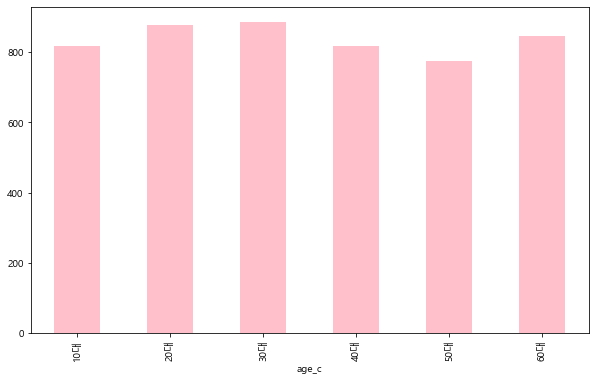

In [738]:
a.sum(axis=0).plot(kind='bar', color='pink', figsize=(10,6))

# 연령대별로 비슷한 구매량을 보임

array([<AxesSubplot:ylabel='40대'>, <AxesSubplot:ylabel='50대'>,
       <AxesSubplot:ylabel='60대'>], dtype=object)

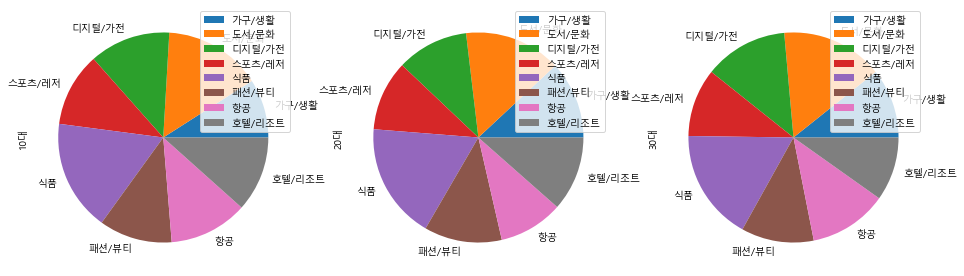

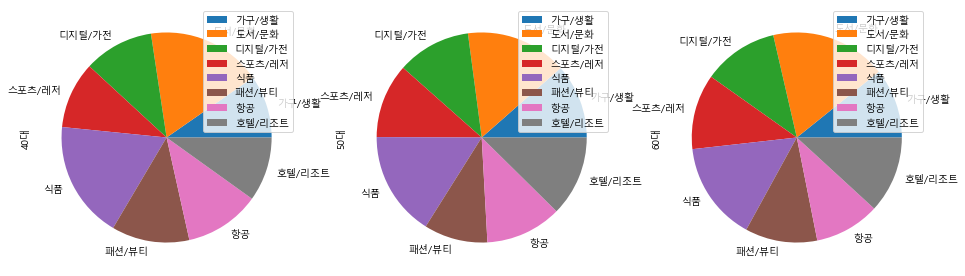

In [739]:
a[['10대','20대','30대']].plot(subplots=True,figsize=(16,25), kind='pie')
a[['40대','50대','60대']].plot(subplots=True,figsize=(16,25), kind='pie')

# 연령대별로 세부 제품 구매량이 비슷함

In [740]:
#21년도 연령별/세부제품별  구매량

b=pd.crosstab(index=df[df['year']==2021].detail_product,
              columns=df[df['year']==2021].age_c)
b

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,96,80,105,88,91,92
도서/문화,131,124,155,126,116,131
디지털/가전,79,84,113,86,84,86
스포츠/레저,94,96,94,87,86,108
식품,132,150,146,148,123,137
패션/뷰티,100,95,104,94,80,83
항공,114,107,81,114,69,89
호텔/리조트,98,98,97,102,85,101


<AxesSubplot:xlabel='age_c'>

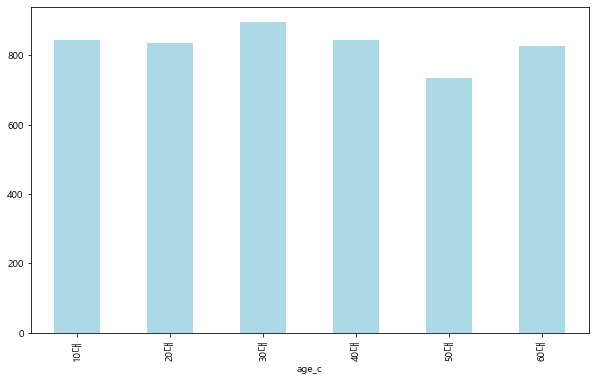

In [741]:
b.sum(axis=0).plot(kind='bar', color='lightblue', figsize=(10,6))

# 연령대별로 비슷한 구매량을 보임

array([<AxesSubplot:ylabel='40대'>, <AxesSubplot:ylabel='50대'>,
       <AxesSubplot:ylabel='60대'>], dtype=object)

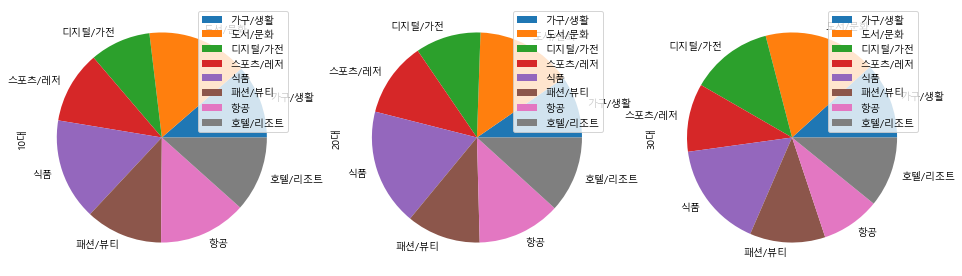

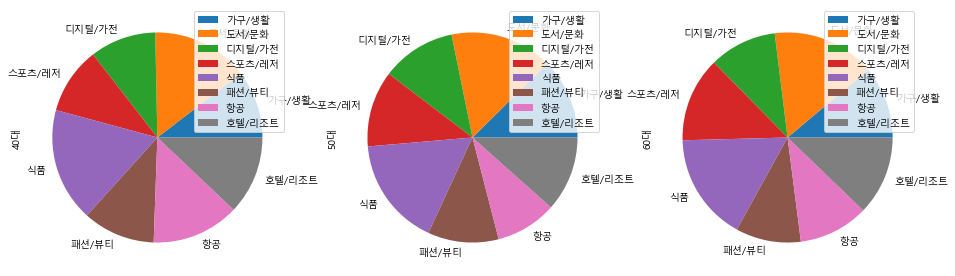

In [742]:
b[['10대','20대','30대']].plot(subplots=True,figsize=(16,25), kind='pie')
b[['40대','50대','60대']].plot(subplots=True,figsize=(16,25), kind='pie')

# 연령대별로 세부 제품 구매량이 비슷함



#### 추후 데이터 수정 시, 고려해야할 점!

- 10,60대의 구매가 많아보임
- 10대는 구매 여력이 없고,
- 60대는 온라인몰이라는 특성상 많은 구매가 없을 거라고 생각

In [743]:
#연도별/세부 제품별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x


table1=pd.pivot_table(df,
                     columns=['year','detail_product'],    
                     values='amount',
                     aggfunc=['count','sum']
                    )


c12=table1.loc[:,'count'][2020].T.merge(table1.loc[:,'count'][2021].T, on='detail_product')
c12.columns=['2020','2021']
c12['2021-2020 difference']=c12['2021']-c12['2020']
c12


#20,21년도 간 구매수량, 구매액의 차이가 크게 없음

,2020,2021,2021-2020 difference
detail_product,,,
가구/생활,533,552,19
도서/문화,810,783,-27
디지털/가전,587,532,-55
스포츠/레저,552,565,13
식품,851,836,-15
패션/뷰티,564,556,-8
항공,564,574,10
호텔/리조트,560,581,21


In [744]:
pd.reset_option('display.float_format')

In [745]:
#고객번호에 따라 연도별 총 구매수량,총 구매액을 알기 위한 피벗테이블 작성

table2=pd.pivot_table(df,
                     index=['cusno','gender','age_c'],
                     columns='year',
                     values='amount',
                     aggfunc=['count','sum']
                     )
table2.applymap(lambda x: f'{x: 0,.2f}').head(10)

#연도별 조금씩 차이가 있어보이긴함
#20년도에 null값이 존재하는 것도 보임-> 유입고객 변수, 이탈고객 변수 만들어보기

count                    sum                
year                 2020   2021            2020            2021
cusno gender age_c                                              
1001  female 20대     3.00   3.00    2,109,081.63    5,772,290.10
1002  female 10대     4.00   8.00   10,466,675.70   11,975,489.79
1003  female 20대     2.00   3.00    1,756,205.48    2,792,612.81
1004  male   30대     4.00   8.00   10,129,286.53    9,416,771.32
1005  female 40대     1.00   6.00    1,776,024.30   11,029,463.21
1006  female 40대     4.00   6.00    9,266,751.56   12,129,527.22
1007  female 10대     5.00   3.00   10,501,210.45    3,725,784.10
1008  female 10대     6.00   4.00    4,787,356.66    6,901,202.29
1009  male   10대     5.00   9.00    5,041,658.06   23,564,420.36
1010  male   20대     3.00   7.00    6,298,305.30    8,481,764.18

In [746]:
#연산하기 위해 null값을 0으로 변경

table2.fillna(0,inplace=True)
table2['count']=table2['count'].astype(int)    #구매횟수를 정수화

In [747]:
#(20-21)총 구매횟수 차이 구하기
table2['count_df']=table2.iloc[:,0]-table2.iloc[:,1]

#(20-21)총 구매액 차이 구하기
table2['amount_df']=table2.iloc[:,2]-table2.iloc[:,3]

#총 구매액이 증가했는지 여부 확인하는 sales 변수 생성
table2['sales']=np.where(table2['amount_df']>=0,0,1)

#21년도 이탈 고객 여부 변수 생성
table2['leave']=np.where(table2.iloc[:,1]==0,1,0)  

#21년도 새로 유입된 고객 여부 변수 생성
table2['welcome']=np.where(table2.iloc[:,0]==0,1,0)


In [748]:
# 컬럼이름 바꿔주고 인덱스 삭제

table2.columns=['count_2020','count_2021','amount_2020','amount_2021', 'count_df',
              'amount_df','sales','leave','welcome']

table2.reset_index(inplace=True)
table2.head(10)

,cusno,gender,age_c,count_2020,count_2021,amount_2020,amount_2021,count_df,amount_df,sales,leave,welcome
0,1001,female,20대,3,3,2109081.63,5772290.10,0,-3663208.47,1,0,0
1,1002,female,10대,4,8,10466675.70,11975489.79,-4,-1508814.09,1,0,0
2,1003,female,20대,2,3,1756205.48,2792612.81,-1,-1036407.33,1,0,0
3,1004,male,30대,4,8,10129286.53,9416771.32,-4,712515.21,0,0,0
4,1005,female,40대,1,6,1776024.30,11029463.21,-5,-9253438.91,1,0,0
5,1006,female,40대,4,6,9266751.56,12129527.22,-2,-2862775.66,1,0,0
6,1007,female,10대,5,3,10501210.45,3725784.10,2,6775426.35,0,0,0
7,1008,female,10대,6,4,4787356.66,6901202.29,2,-2113845.63,1,0,0
8,1009,male,10대,5,9,5041658.06,23564420.36,-4,-18522762.30,1,0,0
9,1010,male,20대,3,7,6298305.30,8481764.18,-4,-2183458.88,1,0,0


In [749]:
#연도별 총 구매 횟수 확인

table2.count_2020.sum(), table2.count_2021.sum()

(5021, 4979)

In [750]:
#연도별 총 구매액 확인

f'{table2.amount_2020.sum():,.2f}', f'{table2.amount_2021.sum():,.2f}'

#크게 차이가 없음

('9,283,618,227.55', '9,267,792,057.14')

## 인사이트 도출을 위한 데이터 수정


#### 데이터 기본 조작

 1. 10대, 60대 수 줄이고, 20,30,40대 늘리기
-  10대들의 구매는 도서/문화, 패션/뷰티에 집중적
-  60대들의 구매는 항공,호텔/리조트(은퇴 후 시간이 많이 남아서), 레저/스포츠(산 많이 다니니까)에 집중적

※ 데이터를 수정하면서, 연령대를 변경하다보니 cusno변수의 고유성에 문제가 생김!
                ex) 하나의 cusno에 연령대가 2개 혹은 지역이 2개 등 

※ 따라서, 데이터 수정을 전체적으로 진행하면서 변화된 고객데이터는 cusno를 null값으로 변환해주고,이후에 cusno변수를 일괄적으로 연령/성별/지역에 따라 일괄적으로 수정하기로 함

In [751]:
#10대 불린인덱싱

teenager=df[(df['age']<20)]
print(len(teenager))

1662


In [752]:
# 제품별 데이터 세부내역 수정: 10대 구매는 도서/문화, 패션/뷰티 집중적

for idx in random.sample(list(teenager.index),1200):   #랜덤으로 1200개 골라서 데이터 변환 진행
    if df.loc[idx,'detail_product'] in ['도서/문화','패션/뷰티']:   #도서/문화, 패션/뷰티는 그대로
        pass
    else:
        
        # 10대의 구매건수를 줄이기 위해 20,30,40대로 바꿔줌
        df.loc[idx,'cusno']=np.nan                         
        df.loc[idx,'age']=random.randint(20,49)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        
        # 나머지 세부 제품별 product, price, quantity를 조정해줌
        if df.loc[idx,'detail_product']== ['식품']:                       
            df.loc[idx,'product']=30
            df.loc[idx,'price']=np.random.uniform(1000,30001)
            df.loc[idx,'quantity']=np.random.randint(1,100)
            
        elif df.loc[idx,'detail_product'] in ['스포츠/레저','가구/생활']:
            df.loc[idx,'product']=20
            df.loc[idx,'price']=np.random.uniform(30000,20000)
            df.loc[idx,'quantity']=np.random.randint(1,50) 
            
        elif df.loc[idx,'detail_product'] in ['항공','호텔/리조트','디지털/가전']:
            df.loc[idx,'product']=10
            df.loc[idx,'price']=np.random.uniform(200000,500001)
            df.loc[idx,'quantity']=np.random.randint(10,11)
            
        #amount역시 다시 수정    
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']    

In [753]:
#10대 고객 1200개 중에서 도서/문화, 패션/뷰티 제외한 데이터가 수정됐음을 알 수 있음

teenager=df[(df['age']<20)]
print(len(teenager))

771


In [754]:
#60대 

elder=df[(df['age']>=60)]    
print(len(elder))

1673


In [755]:
# 제품별 데이터 세부내역 수정

for idx in random.sample(list(elder.index),900):      #랜덤으로 900개 골라서 데이터 변환 진행  
    if df.loc[idx,'detail_product'] in ['항공','호텔/리조트','스포츠/레저']:   #항공, 호텔/리조트,스포츠/레저는 그대로
        pass
    
    else:

        # 60대의 구매건수를 줄이기 위해 20,30,40,50대로 바꿔줌
        df.loc[idx,'cusno']=np.nan
        df.loc[idx,'age']=random.randint(20,59)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        
        # 나머지 세부 제품별 product, price, quantity를 조정해줌
        if df.loc[idx,'detail_product']== ['식품','도서/문화']:
            df.loc[idx,'product']=30
            df.loc[idx,'price']=np.random.uniform(1000,30001)
            df.loc[idx,'quantity']=np.random.randint(1,100)
        elif df.loc[idx,'detail_product'] in ['패션/뷰티','가구/생활']:
            df.loc[idx,'product']=20
            df.loc[idx,'price']=np.random.uniform(30000,20000)
            df.loc[idx,'quantity']=np.random.randint(1,50) 
        elif df.loc[idx,'detail_product'] in ['디지털/가전']:
            df.loc[idx,'product']=10
            df.loc[idx,'price']=np.random.uniform(200000,500001)
            df.loc[idx,'quantity']=np.random.randint(10,11)
            
        # amount역시 다시 수정 
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']    


In [756]:
#60대 고객 900개 중에서 항공, 호텔/리조트, 스포츠/레저 제외한 데이터가 수정됐음을 알 수 있음

elder=df[(df['age']>=60)]    
print(len(elder))

1082


In [757]:
#20년도 연령별 세부제품 구매 수량 확인

c=pd.crosstab(index=df[df['year']==2020].detail_product,
                                   columns=df[df['year']==2020].age_c)
c

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,21,133,127,112,101,39
도서/문화,123,150,157,163,142,75
디지털/가전,34,130,147,127,103,46
스포츠/레저,22,115,120,108,89,98
식품,37,220,194,200,140,60
패션/뷰티,92,117,120,108,93,34
항공,21,107,130,130,91,85
호텔/리조트,28,128,111,97,96,100


array([<AxesSubplot:ylabel='40대'>, <AxesSubplot:ylabel='50대'>,
       <AxesSubplot:ylabel='60대'>], dtype=object)

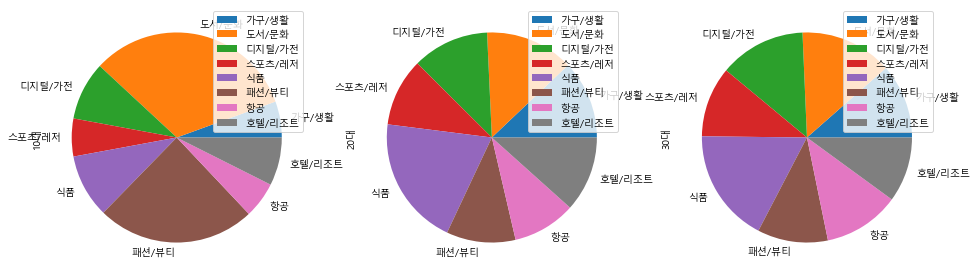

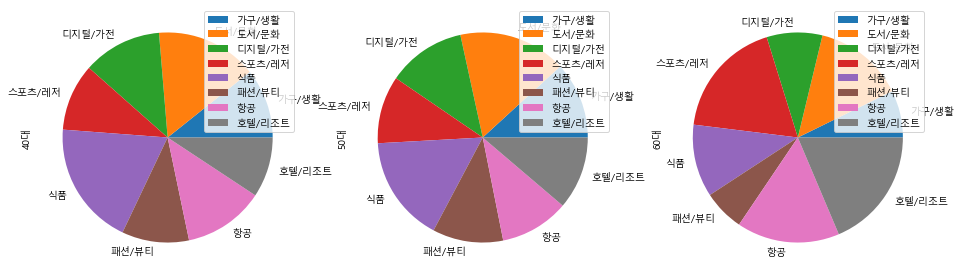

In [758]:
c[['10대','20대','30대']].plot(subplots=True,figsize=(16,25), kind='pie')
c[['40대','50대','60대']].plot(subplots=True,figsize=(16,25), kind='pie')

In [759]:
#21년도 연령별 세부제품 구매 수량 확인

d=pd.crosstab(index=df[df['year']==2021].detail_product,
                                   columns=df[df['year']==2021].age_c)
d

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,24,119,138,121,105,45
도서/문화,131,145,167,144,135,61
디지털/가전,23,115,143,112,100,39
스포츠/레저,33,119,113,106,86,108
식품,30,212,197,198,138,61
패션/뷰티,100,102,116,111,86,41
항공,32,122,113,149,69,89
호텔/리조트,20,129,116,130,85,101


array([<AxesSubplot:ylabel='40대'>, <AxesSubplot:ylabel='50대'>,
       <AxesSubplot:ylabel='60대'>], dtype=object)

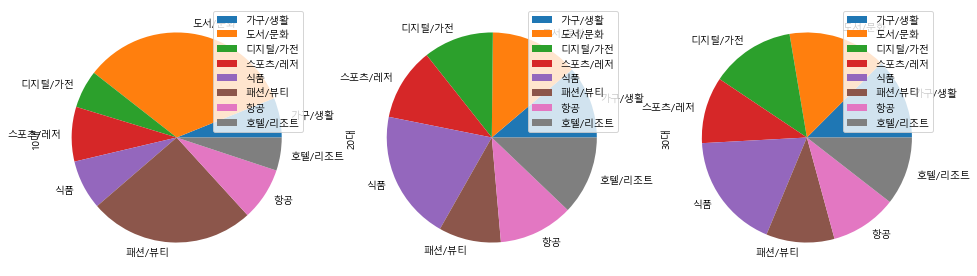

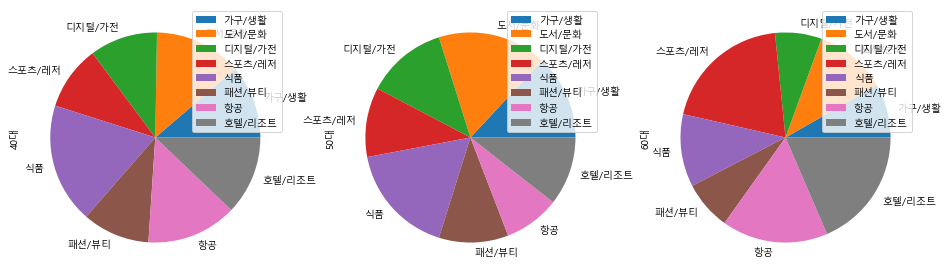

In [760]:
d[['10대','20대','30대']].plot(subplots=True,figsize=(16,25), kind='pie')
d[['40대','50대','60대']].plot(subplots=True,figsize=(16,25), kind='pie')

In [761]:
#10대의 도서/문화, 패션/뷰티를 제외하고 구매량이 감소한 것을 확인
#60대도 항공, 호텔/리조트,스포츠/레저 제외하고 어느정도 구매량이 감소한 것을 확인

#### 고객의 구매 감소 요인 만들기
- 배경: 지속된 코로나 상황에서 n인 이상 집합 금지로 스포츠 활동이 줄어들었으며, 이용가능한 호텔 객실 수 감소, 마스크 미착용 시 벌금 부여 등 거리두기가 강화된 상황 

<img src='https://img0.yna.co.kr/etc/graphic/YH/2022/04/15/GYH2022041500020004400_P4.jpg'>

<img src='http://www.yakup.com/data/editor/news/202106/RprDK9ri698.jpg' width='800px'>




##### 어떤 인사이트를 도출할까?
1. 스포츠/레저를 즐겨사는 20-30대 남자들 구매가 감소

2. 20-30대 후반의 패션/뷰티 제품 구매가 감소함  

3. 21년도 구매상품에 고가제품보다 중저가 제품이 많아짐
    - 21년도 항공,호텔/리조트 등 고가제품 구매가 감소함
    - 30-50대 여성의 식품, 가구/생활, 중저가 제품 구매가 증가함
    - 10-20대의 도서/문화 저가 제품 구매가 증가함 

#### 20년도 항공기 예약 건수를 줄이기-> 패션/뷰티, 레저/스포츠 20,30대의 구매 건수 증가 
- 21년도 구매감소를 확연하게 보여주기 위함


In [762]:
#세부제품이 항공인 것을 불린인덱싱

airplane20=df[(df['detail_product']=='항공')&(df['date'].dt.year==2020)]
len(airplane20)

564

In [763]:
#마찬가지로 cusno는  null값으로

for idx in random.sample(list(airplane20.index),300):      #랜덤으로 300개 골라서 데이터 변환 진행  
    df.loc[idx,'cusno']=np.nan
    df.loc[idx,'detail_product']=random.choice(['패션/뷰티','스포츠/레저'])
    df.loc[idx,'age']=random.randint(20,39)
    df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
    df.loc[idx,'product']=20
    df.loc[idx,'price']=np.random.uniform(30000,200001)
    df.loc[idx,'quantity']=np.random.randint(10,50)
    df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']
    
    #패션/뷰티는 여자, 스포츠/레저는 남자로 변환
    if df.loc[idx,'detail_product']=='패션/뷰티':
        df.loc[idx,'gender']='female'
    elif df.loc[idx,'detail_product']=='스포츠/레저':
        df.loc[idx,'gender']='male'

In [764]:
#세부제품이 항공인 것을 불린인덱싱

airplane20=df[(df['detail_product']=='항공')&(df['date'].dt.year==2020)]
airplane20

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,funnels,year
8,2019593,NaN,female,경북,48,40대,10,항공,272508.576162,10,2.725086e+06,2020-01-01,수,19,가격비교 사이트,2020
18,2022114,1457.0,male,경기,65,60대,10,항공,457939.710000,9,4.121457e+06,2020-01-02,목,3,sns 홍보사이트,2020
38,2026864,NaN,male,경남,35,30대,10,항공,368164.797413,10,3.681648e+06,2020-01-03,금,18,가격비교 사이트,2020
48,2039727,1653.0,male,경남,31,30대,10,항공,351595.800000,6,2.109575e+06,2020-01-04,토,15,온라인사이트,2020
60,2029278,1880.0,male,전북,31,30대,10,항공,314847.840000,1,3.148478e+05,2020-01-05,일,5,온라인사이트,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,2025517,NaN,male,강원,48,40대,10,항공,260824.670573,10,2.608247e+06,2020-12-25,금,14,sns 홍보사이트,2020
4956,2031011,NaN,male,서울,36,30대,10,항공,354881.411619,10,3.548814e+06,2020-12-27,일,1,sns 홍보사이트,2020
4973,2022869,1301.0,female,전북,32,30대,10,항공,435998.400000,3,1.307995e+06,2020-12-28,월,24,가격비교 사이트,2020
4994,2031916,1716.0,female,전남,58,50대,10,항공,416434.460000,5,2.082172e+06,2020-12-30,수,6,sns 홍보사이트,2020


#### 21년도 항공기 예약 건수를 줄이기-> 40,50대의 식품 구매 건수 증가/30, 40,50대의 가구/생활 구매 건수 증가

In [765]:
#세부제품이 항공인 것을 불린인덱싱

airplane21=df[(df['detail_product']=='항공')&(df['date'].dt.year==2021)]
len(airplane21)

574

In [766]:
for idx in random.sample(list(airplane21.index),400): #랜덤으로 400개 골라서 데이터 변환 진행
    
    #세부제품을 식품, 가구/생활로 변환
    df.loc[idx,'detail_product']=random.choice(['식품','가구/생활'])
    df.loc[idx,'cusno']=np.nan
    
    #식품의 경우 30,40,50대 여자가 되도록
    if df.loc[idx,'detail_product']=='식품':
        df.loc[idx,'gender']=random.choice(['female'])
        df.loc[idx,'age']=random.randint(30,49)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        df.loc[idx,'product']=30
        df.loc[idx,'price']=np.random.uniform(1000,30001)
        df.loc[idx,'quantity']=np.random.randint(1,100)
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']
        
    #가구/생활의 경우 30,40,50대가 되도록
    elif df.loc[idx,'detail_product']=='가구/생활':
        df.loc[idx,'detail_product']=random.choice(['가구/생활'])
        df.loc[idx,'gender']=random.choice(['female','male'])
        df.loc[idx,'age']=random.randint(30,59)
        df.loc[idx,'age_c']=str(df.loc[idx,'age'])[0]+'0대'
        df.loc[idx,'product']=20
        df.loc[idx,'price']=np.random.uniform(30000,200001)
        df.loc[idx,'quantity']=np.random.randint(1,20)
        df.loc[idx,'amount']=df.loc[idx,'price']*df.loc[idx,'quantity']

In [767]:
#세부제품이 항공인 것을 불린인덱싱

airplane21=df[(df['detail_product']=='항공')&(df['date'].dt.year==2021)]
airplane21

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,funnels,year
5057,2127662,1423.0,female,강원,32,30대,10,항공,238538.010000,8,1.908304e+06,2021-01-03,일,17,온라인사이트,2021
5062,2147918,NaN,female,전남,38,30대,10,항공,272089.951917,10,2.720900e+06,2021-01-03,일,24,쿠팡 어플,2021
5091,2124716,NaN,male,전북,40,40대,10,항공,475678.195288,10,4.756782e+06,2021-01-05,화,13,온라인사이트,2021
5092,2136168,1042.0,female,충남,31,30대,10,항공,441834.070000,3,1.325502e+06,2021-01-05,화,15,sns 홍보사이트,2021
5097,2130645,1183.0,male,경남,26,20대,10,항공,202921.260000,9,1.826291e+06,2021-01-06,수,2,쿠팡 어플,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9781,2110187,NaN,female,경남,38,30대,10,항공,437825.529832,10,4.378255e+06,2021-12-16,목,1,가격비교 사이트,2021
9835,2145519,NaN,female,경남,33,30대,10,항공,362741.695498,10,3.627417e+06,2021-12-20,월,6,쿠팡 어플,2021
9908,2143006,1559.0,female,전북,63,60대,10,항공,211387.950000,9,1.902492e+06,2021-12-25,토,21,가격비교 사이트,2021
9927,2146219,1433.0,female,경남,60,60대,10,항공,418215.290000,1,4.182153e+05,2021-12-27,월,7,가격비교 사이트,2021


In [768]:
df.head()

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,funnels,year
0,2013525,NaN,male,경북,20,20대,20,스포츠/레저,27032.242026,41,1.108322e+06,2020-01-01,수,9,sns 홍보사이트,2020
1,2013967,1502.0,male,경남,32,30대,20,패션/뷰티,40720.930000,21,8.551395e+05,2020-01-01,수,10,온라인사이트,2020
2,2038201,1381.0,male,경북,19,10대,10,호텔/리조트,475130.780000,10,4.751308e+06,2020-01-01,수,11,온라인사이트,2020
3,2012688,1594.0,female,충북,60,60대,30,도서/문화,24313.790000,97,2.358438e+06,2020-01-01,수,11,sns 홍보사이트,2020
4,2034870,1707.0,female,부산,55,50대,10,디지털/가전,245040.980000,10,2.450410e+06,2020-01-01,수,13,sns 홍보사이트,2020


### 수정한 데이터 확인

In [769]:
#데이터에 수정을 가해서 cusno를 null값으로 바뀐 고객 수 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  object        
 1   cusno           7919 non-null   float64       
 2   gender          10000 non-null  object        
 3   region          10000 non-null  object        
 4   age             10000 non-null  int32         
 5   age_c           10000 non-null  object        
 6   product         10000 non-null  int64         
 7   detail_product  10000 non-null  object        
 8   price           10000 non-null  float64       
 9   quantity        10000 non-null  int64         
 10  amount          10000 non-null  float64       
 11  date            10000 non-null  datetime64[ns]
 12  day             10000 non-null  object        
 13  time            10000 non-null  int32         
 14  funnels         10000 non-null  object        
 15  yea

In [770]:
df[df['cusno'].isnull()]

,id,cusno,gender,region,age,age_c,product,detail_product,price,quantity,amount,date,day,time,funnels,year
0,2013525,NaN,male,경북,20,20대,20,스포츠/레저,27032.242026,41,1.108322e+06,2020-01-01,수,9,sns 홍보사이트,2020
7,2019232,NaN,female,전북,25,20대,10,디지털/가전,336796.317452,10,3.367963e+06,2020-01-01,수,18,온라인사이트,2020
8,2019593,NaN,female,경북,48,40대,10,항공,272508.576162,10,2.725086e+06,2020-01-01,수,19,가격비교 사이트,2020
25,2038949,NaN,female,전남,51,50대,10,디지털/가전,303215.168353,10,3.032152e+06,2020-01-02,목,14,가격비교 사이트,2020
29,2045558,NaN,male,전북,42,40대,10,디지털/가전,484134.354882,10,4.841344e+06,2020-01-02,목,19,온라인사이트,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,2112659,NaN,female,경북,47,40대,30,식품,15383.494083,55,8.460922e+05,2021-12-31,금,5,온라인사이트,2021
9988,2140338,NaN,female,충남,38,30대,10,디지털/가전,261697.206867,10,2.616972e+06,2021-12-31,금,9,가격비교 사이트,2021
9995,2122560,NaN,male,강원,45,40대,30,식품,3677.320000,65,2.390258e+05,2021-12-31,금,19,쿠팡 어플,2021
9997,2145209,NaN,female,부산,20,20대,30,식품,25705.420000,6,1.542325e+05,2021-12-31,금,23,가격비교 사이트,2021


In [771]:
# cusno 그룹화 후 일괄 수정: null 값이 아닌 cusno를 성별, 지역, 연령별로 인덱스 모음집을 만들어서 
# null값인 cusno에 랜덤추출해서 채워줌


#그룹화
group=df.groupby(['gender','region','age_c'])


category=[]

for g in ['male','female']:
    for r in set(df['region']):
        for a in set(df['age_c']):
             category.append([g,r,a,list(group.get_group((g,r,a)).index)])

In [772]:
category[0]

['male',
 '전북',
 '30대',
 [60,
  102,
  108,
  497,
  705,
  730,
  783,
  787,
  946,
  1034,
  1054,
  1106,
  1127,
  1162,
  1171,
  1319,
  1329,
  1751,
  1786,
  1814,
  1828,
  1946,
  1947,
  1962,
  1973,
  2031,
  2151,
  2288,
  2392,
  2393,
  2397,
  2407,
  2546,
  2714,
  2755,
  2848,
  2882,
  2895,
  2899,
  2952,
  3007,
  3167,
  3168,
  3279,
  3493,
  3503,
  3515,
  3629,
  3653,
  3657,
  3684,
  3734,
  3812,
  3845,
  3899,
  3904,
  3984,
  4035,
  4143,
  4218,
  4266,
  4351,
  4399,
  4425,
  4521,
  4574,
  4639,
  4802,
  5001,
  5145,
  5329,
  5367,
  5451,
  5709,
  5778,
  5835,
  5836,
  5871,
  5883,
  5962,
  6006,
  6022,
  6098,
  6226,
  6257,
  6305,
  6353,
  6451,
  6463,
  6505,
  6508,
  6578,
  6643,
  6726,
  6833,
  7392,
  7433,
  7478,
  7499,
  7555,
  7578,
  7620,
  7626,
  7738,
  7811,
  7925,
  7948,
  8042,
  8138,
  8205,
  8217,
  8298,
  8307,
  8320,
  8360,
  8385,
  8414,
  8455,
  8517,
  8589,
  8834,
  9051,
  9201,
  

In [773]:
#cusno 수정
#while문으로 null값이 다 채워질때까지 진행

while True:
    for i,j,k,m in category:

        filter_condition=(df['cusno'].isnull())&(df['gender']==i)&(df['region']==j)&(df['age_c']==k)
        idx_filter=list(df[filter_condition].index)

        for idx in idx_filter:
            df.loc[idx,'cusno']=df.loc[np.random.choice(m),'cusno']
    if df.isnull().sum().sum()==0:
        break
      

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10000 non-null  object        
 1   cusno           10000 non-null  float64       
 2   gender          10000 non-null  object        
 3   region          10000 non-null  object        
 4   age             10000 non-null  int32         
 5   age_c           10000 non-null  object        
 6   product         10000 non-null  int64         
 7   detail_product  10000 non-null  object        
 8   price           10000 non-null  float64       
 9   quantity        10000 non-null  int64         
 10  amount          10000 non-null  float64       
 11  date            10000 non-null  datetime64[ns]
 12  day             10000 non-null  object        
 13  time            10000 non-null  int32         
 14  funnels         10000 non-null  object        
 15  yea

In [775]:
len(df['cusno'].unique())

996

In [776]:
#cusno가 잘 배정됐는지 확인
#cusno별로 그룹화해서 성별, 연령대, 지역 고유 개수가 한개인지 확인

for i in df['cusno'].unique():
    g=df.groupby('cusno').get_group(i)      
    if len(set(g['gender']))>1:
        print(g['cusno'])
    if len(set(g['region']))>1:
        print(g['cusno'])
    if len(set(g['age_c']))>1:
        print(g['cusno'])


### 변수 추가

In [777]:
'''
이벤트 여부 변수 추가:
1: 쿠팡멤버쉽(멤버쉽 가입시, 쿠팡플레이 연계가 가능한 제도)(21년도만)
2: 첫구매 할인(20,21년도 처음 구매하는 사람만)
0: 없음
'''


#첫구매 고객 중 80%의 40,50대가 '첫구매 할인' 혜택을 적용 받음
#첫구매 고객 중 20%의 20,30대가 '첫구매 할인' 혜택을 적용받음

'\n이벤트 여부 변수 추가:\n1: 쿠팡멤버쉽(멤버쉽 가입시, 쿠팡플레이 연계가 가능한 제도)(21년도만)\n2: 첫구매 할인(20,21년도 처음 구매하는 사람만)\n0: 없음\n'

- event: 첫구매 할인

In [778]:
df['event']=np.nan

grouped=df.groupby('cusno')

idx=[]
for i in range(1001,2001):           # 그룹별로 date 오름차순 정렬 이후, 인덱스 추출
    try:                             # cusno null값을 채워주는 데이터 수정 이후, 없어진 cusno 번호가 있기 때문에 예외처리문으로 작성
        first=grouped.get_group(i).sort_values(['date']).index[0]
        idx.append(first)
    except:
        pass
    
len(idx)

996

In [779]:
#첫구매 고객 중 80%의 40,50대가 '첫구매 할인' 혜택을 적용 받음

r_idx=random.sample(idx,int(len(idx)*0.8))

for i in r_idx:
    if df.iloc[i]['age_c'] in ['40대','50대']:
        df.loc[i,'event']='첫구매 할인'

In [780]:
#첫구매 고객 중 20%의 20,30대가 '첫구매 할인' 혜택을 적용받음

r_idx=random.sample(idx,int(len(idx)*0.2))

for i in r_idx:
    if df.iloc[i]['age_c'] in ['20대','30대']:
        df.loc[i,'event']='첫구매 할인'

In [781]:
df[['age_c','event']].value_counts()

age_c  event 
40대    첫구매 할인    133
50대    첫구매 할인    122
20대    첫구매 할인     38
30대    첫구매 할인     35
dtype: int64

첫구매 할인 이벤트를 이용하게된 유입경로(funnels)는 SNS홍보사이트로 하겠음

- event: 쿠팡멤버쉽

In [782]:
# pd.options.display.max_rows= 60
grouped=df.groupby('cusno')

idx=df[(df['year']==2021)&(df['event']!='첫구매 할인')&(df['age']<55)&(df['age']>20)].index


#21년도 구매자 중 50%가 쿠팡멤버쉽
r_idx=random.sample(list(idx),int(len(idx)*0.5))

for i in r_idx:
    df.loc[i,'event']='쿠팡 멤버쉽'


In [783]:
pd.options.display.float_format = '{:.2f}'.format   
pd.pivot_table(df,
                     index=['year'],
                    columns='event',
                     values='amount',
                     aggfunc=['count'])

#21년도 첫구매할인 이벤트로 유입된 고객 수가 적고, 쿠팡멤버쉽 이벤트 이용자는 늘어난 것으로 보임

count        
event 첫구매 할인  쿠팡 멤버쉽
year                
2020  328.00     NaN
2021     NaN 1807.00

In [784]:
pd.pivot_table(df,
              index=['year','funnels'],
              columns='event',
              values='amount',
              aggfunc=['count'])

count       
event          첫구매 할인 쿠팡 멤버쉽
year funnels                
2020 sns 홍보사이트  66.00    NaN
     가격비교 사이트   87.00    NaN
     온라인사이트     90.00    NaN
     쿠팡 어플      85.00    NaN
2021 sns 홍보사이트    NaN 494.00
     가격비교 사이트     NaN 476.00
     온라인사이트       NaN 408.00
     쿠팡 어플        NaN 429.00

In [785]:
pd.pivot_table(df,
              index=['year','funnels','event',],
              columns='age_c',
              values='amount',
              aggfunc=['count'])

count              
age_c                   20대  30대  40대 50대
year funnels   event                     
2020 sns 홍보사이트 첫구매 할인    13    3   23  27
     가격비교 사이트  첫구매 할인     9    9   38  31
     온라인사이트    첫구매 할인     7   12   39  32
     쿠팡 어플     첫구매 할인     9   11   33  32
2021 sns 홍보사이트 쿠팡 멤버쉽   127  150  161  56
     가격비교 사이트  쿠팡 멤버쉽   113  169  143  51
     온라인사이트    쿠팡 멤버쉽    87  139  142  40
     쿠팡 어플     쿠팡 멤버쉽   105  143  128  53

#### 인사이트 추가
4. 첫구매할인을 적용한 사람들의 대부분은 SNS홍보사이트로 유입됨
- 한 고객이 20,21년도에 중복 구매한 사람들이 많아, 데이터에 유입 고객이 적은 점을 활용해서 첫구매할인을 통해 유입을 늘리기 위한 방법은  SNS홍보임!을 인사이트로 도출할 것

In [786]:
df[['funnels']].value_counts()

funnels  
쿠팡 어플        2539
sns 홍보사이트    2523
온라인사이트       2478
가격비교 사이트     2460
dtype: int64

In [787]:
idx=df.loc[(df['event']=='첫구매 할인')&(df['funnels']!='sns 홍보사이트'),'funnels'].index

r_idx=random.sample(list(idx),int(len(idx)*0.7))

for i in r_idx:
    df.loc[i,'funnels']='sns 홍보사이트'

In [788]:
df[['year','funnels']].value_counts()
df['funnels'].value_counts()

#sns 홍보사이트 수가 소폭 증가, 이유는 cusno 1000개 중 첫구매인 경우만 데이터를 변환했기 때문임

sns 홍보사이트    2706
쿠팡 어플        2476
온라인사이트       2415
가격비교 사이트     2403
Name: funnels, dtype: int64

In [789]:
#연도별/세부 제품별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

#pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x


table3=pd.pivot_table(df,
                     columns=['year','detail_product'],
                     values='amount',
                     aggfunc=['count','sum']
                    )


c3=table3.loc[:,'count'][2020].T.merge(table3.loc[:,'count'][2021].T, on='detail_product')
c3.columns=['2020','2021']
c3['2021-2020 difference']=c3['2021']-c3['2020']
c3

# 스포츠/레저, 패션/뷰티 구매량이 감소
# 가구/생활, 식품 구매량이 증가, 스포츠/레저 감소

,2020,2021,2021-2020 difference
detail_product,,,
가구/생활,533,736,203
도서/문화,810,783,-27
디지털/가전,587,532,-55
스포츠/레저,702,565,-137
식품,851,1052,201
패션/뷰티,714,556,-158
항공,264,174,-90
호텔/리조트,560,581,21


<AxesSubplot:xlabel='detail_product'>

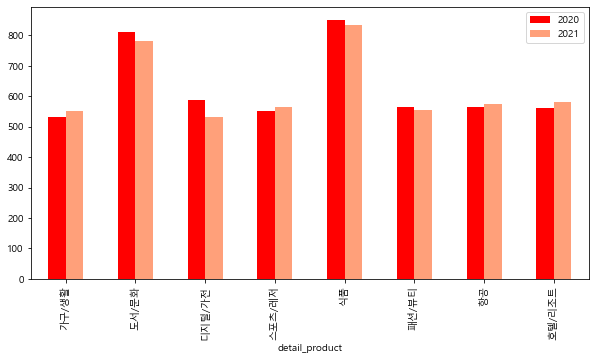

In [790]:
#데이터 수정 전 분포

c12[['2020','2021']].plot(kind='bar', color=['red','lightsalmon'], figsize=(10,5))

<AxesSubplot:xlabel='detail_product'>

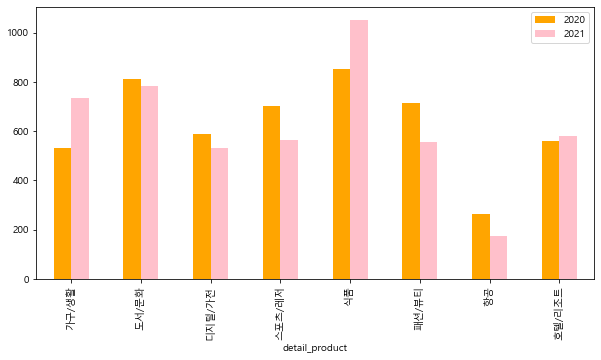

In [791]:
#데이터 수정 후 분포
c3[['2020','2021']].plot(kind='bar', color=['orange','pink'], figsize=(10,5))

In [792]:
s3=table3.loc[:,'sum'][2020].T.merge(table3.loc[:,'sum'][2021].T, on='detail_product')
s3.columns=['2020','2021']
s3['2021-2020 difference']=s3['2021']-s3['2020']

s3.applymap(lambda x: f'{x:,.2f}')

# 억단위로 보자
# 스포츠/레저, 패션/뷰티, 항공 구매액 감소
# 가구/생활, 식품 구매액 증가

,2020,2021,2021-2020 difference
detail_product,,,
가구/생활,"1,378,026,740.98","1,462,909,202.64","84,882,461.66"
도서/문화,"621,698,273.96","592,584,004.01","-29,114,269.95"
디지털/가전,"1,298,712,336.15","1,140,033,042.19","-158,679,293.96"
스포츠/레저,"1,871,717,474.04","1,498,530,133.90","-373,187,340.14"
식품,"647,716,277.40","812,903,568.54","165,187,291.14"
패션/뷰티,"1,983,939,418.41","1,480,165,319.78","-503,774,098.63"
항공,"526,092,076.56","375,474,549.67","-150,617,526.89"
호텔/리조트,"1,198,918,084.57","1,317,635,520.12","118,717,435.55"


<AxesSubplot:xlabel='detail_product'>

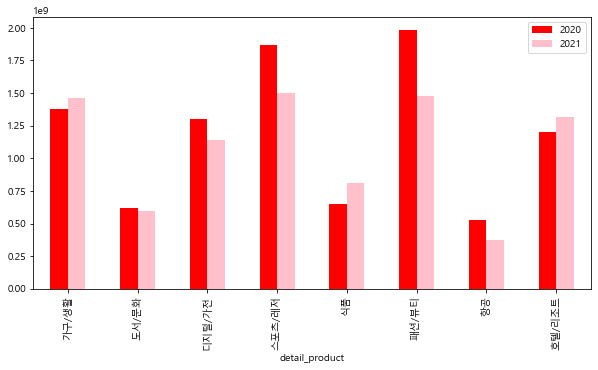

In [793]:
s3[['2020','2021']].plot(kind='bar', color=['red','pink'], figsize=(10,5))

In [794]:
#연도별 총 구매수량 및 총 구매액을 알기 위한 피벗테이블 작성

pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x
table4=pd.pivot_table(df,
                     index=['cusno','gender','age_c'],
                     columns='year',
                     values='amount',
                     aggfunc=['count','sum']
                    )

table4.applymap(lambda x: f'{x:,.2f}').head(10)

count                  sum               
year                   2020  2021           2020           2021
cusno   gender age_c                                           
1001.00 female 20대     3.00  3.00   2,109,081.63   5,772,290.10
1002.00 female 10대     1.00  7.00   2,040,915.60  11,052,744.75
1003.00 female 20대     3.00  4.00   4,233,464.40   3,845,309.11
1004.00 male   30대    11.00  9.00  21,753,012.58  10,552,320.17
1005.00 female 40대     2.00  7.00   2,461,810.22   8,911,570.69
1006.00 female 40대     6.00  9.00  11,611,802.45  12,636,191.29
1007.00 female 10대     2.00  2.00   3,720,544.20   2,640,535.74
1008.00 female 10대     3.00  2.00   1,649,336.15   2,690,313.88
1009.00 male   10대     1.00  2.00   2,707,798.16   4,703,186.88
1010.00 male   20대     5.00  7.00   9,114,605.91   8,481,764.18

In [795]:
#(20-21)저가/중가/고가 제품 구매량의 차이

pd.options.display.float_format = '{:.2f}'.format    #과학적 표기법 x
table44=pd.pivot_table(df,
                     index=['year','cusno'],
                     columns=['product'],
                     values='amount',  
                     aggfunc=['count']
                    )
table44.fillna(0,inplace=True)     

table44=table44.loc[(2020)]-table44.loc[(2021)]


table55=pd.pivot_table(df,
                     index='cusno',
                     columns=['event'],
                     values='amount',  
                     aggfunc=['count']
                    )

table66=table44.join(table55)

table66.fillna(0,inplace=True)    

In [833]:
table66.head()

count                          
product    10    20    30 첫구매 할인 쿠팡 멤버쉽
cusno                                  
1001.00  1.00 -1.00  0.00   0.00   2.00
1002.00 -1.00 -4.00 -1.00   0.00   0.00
1003.00  0.00  1.00 -2.00   1.00   3.00
1004.00 -1.00  3.00  0.00   0.00   6.00
1005.00 -1.00 -2.00 -2.00   1.00   4.00

In [796]:
# 데이터프레임 합치기
table4=table4.join(table66)
table4.fillna(0,inplace=True)     #연산 위해null값을 0으로 변경
table4['count']=table4['count'].astype(int)

In [797]:
#(20-21)총 구매횟수 차이 구하기
table4['count_df']=table4.iloc[:,0]-table4.iloc[:,1]

#(20-21)총 구매액 차이 구하기
table4['amount_df']=table4.iloc[:,2]-table4.iloc[:,3]

#(20-21)총 구매액 증감율 구하기
table4['amount_df_per']=table4['amount_df']/table4.iloc[:,2]

#총 구매액이 증가했는지 여부 확인하는 sales 변수 생성
table4['sales']=np.where(table4['amount_df']>0,1,0)   #감소가 1

#21년도 이탈 고객 여부 변수 생성
table4['leave']=np.where(table4.iloc[:,1]==0,1,0)

#21년도 새로 유입된 고객 여부 변수 생성
table4['welcome']=np.where(table4.iloc[:,0]==0,1,0)

In [798]:
# 컬럼이름 바꿔주고 인덱스 삭제

table4.columns=['count_2020','count_2021','amount_2020','amount_2021', 'product_10',
                'product_20','product_30','event_첫구매할인','event_쿠팡멤버쉽','count_df',
              'amount_df','amount_df_per', 'sales','leave','welcome']
table4.reset_index(inplace=True)
table4.head()

,cusno,gender,age_c,count_2020,count_2021,amount_2020,amount_2021,product_10,product_20,product_30,event_첫구매할인,event_쿠팡멤버쉽,count_df,amount_df,amount_df_per,sales,leave,welcome
0,1001.00,female,20대,3,3,2109081.63,5772290.10,1,-1,0,0,2,0,-3663208.47,-1.74,0,0,0
1,1002.00,female,10대,1,7,2040915.60,11052744.75,-1,-4,-1,0,0,-6,-9011829.15,-4.42,0,0,0
2,1003.00,female,20대,3,4,4233464.40,3845309.11,0,1,-2,1,3,-1,388155.29,0.09,1,0,0
3,1004.00,male,30대,11,9,21753012.58,10552320.17,-1,3,0,0,6,2,11200692.41,0.51,1,0,0
4,1005.00,female,40대,2,7,2461810.22,8911570.69,-1,-2,-2,1,4,-5,-6449760.47,-2.62,0,0,0


In [799]:
#20년도 대비 21년도 구매가 감소한 고객 수

table4.sales.value_counts()

#고객수가 감소하긴 했지만 미미함

1    541
0    455
Name: sales, dtype: int64

In [800]:
#20년도 대비 21년도 구매가 감소한 평균 금액 수

f'{table4.amount_df.mean(): ,.2f}원'

' 849,985.28원'

## 인사이트 도출

- 아무것도 모르는 척 데이터 탐색하기

In [801]:
#연도별 총 구매 횟수 확인

table4.count_2020.sum(), table4.count_2021.sum() 

#구매횟수의 차이는 크지 않음

(5021, 4979)

In [802]:
#연도별 총 구매액 및 차액 확인

print(f'2020년도 총 구매액: {table4.amount_2020.sum():,.2f}원')
print(f'2021년도 총 구매액: {table4.amount_2021.sum():,.2f}원','\n')
print(f'총 구매액 차이: {(table4.amount_2021.sum()-table4.amount_2020.sum()):,.2f}원' )

#그러나 총구매액은 억대로 감소함

2020년도 총 구매액: 9,526,820,682.07원
2021년도 총 구매액: 8,680,235,340.86원 

총 구매액 차이: -846,585,341.21원


In [803]:
#데이터 살펴보기


import warnings
warnings.filterwarnings(('ignore'))



#세부 제품별, 연도별 구매수량과 차이 확인 
table3=pd.pivot_table(df,
                     columns=['year','detail_product'],
                     values='amount',
                     aggfunc=['count','sum']
                    )

table5=table3[('count',2020)].append(table3[('count',2021)])
table5=table5.append(table5.iloc[1]-table5.iloc[0]).T

table5.columns=['2020년도','2021년도','구매 수량 차이(21년도-20년도)']
table5.T

#스포츠/레저, 패션/뷰티 부문에서 많이 줄어든 것을 알 수 있음
#하지만, 가구/생활, 식품 부문 등은 증가함

detail_product,가구/생활,도서/문화,디지털/가전,스포츠/레저,식품,패션/뷰티,항공,호텔/리조트
2020년도,533,810,587,702,851,714,264,560
2021년도,736,783,532,565,1052,556,174,581
구매 수량 차이(21년도-20년도),203,-27,-55,-137,201,-158,-90,21


In [804]:
#세부 제품별, 연도별 구매액과 차이 확인

table6=table3[('sum',2020)].append(table3[('sum',2021)])
table6=table6.append(table6.iloc[1]-table6.iloc[0])

table6.index=['2020년도','2021년도','구매액 차이(21년도-20년도)']
table6.applymap(lambda x: f'{x: 0,.2f}')

#구매액으로 찾아본 결과,
#억단위로 증가한 제품은 가구/생활, 식품
#억단위로 감소한 제품은 스포츠/레저, 패션/뷰티임

detail_product,가구/생활,도서/문화,디지털/가전,스포츠/레저,식품,패션/뷰티,항공,호텔/리조트
2020년도,"1,378,026,740.98","621,698,273.96","1,298,712,336.15","1,871,717,474.04","647,716,277.40","1,983,939,418.41","526,092,076.56","1,198,918,084.57"
2021년도,"1,462,909,202.64","592,584,004.01","1,140,033,042.19","1,498,530,133.90","812,903,568.54","1,480,165,319.78","375,474,549.67","1,317,635,520.12"
구매액 차이(21년도-20년도),"84,882,461.66","-29,114,269.95","-158,679,293.96","-373,187,340.14","165,187,291.14","-503,774,098.63","-150,617,526.89","118,717,435.55"


In [805]:
#이렇게 차이가 나는 이유를 연령대별로 확인해보자
#연도별/연령별 제품 구매수량 확인

import seaborn as sns
import matplotlib.pyplot as plt

In [806]:
#20년도

table7=pd.crosstab(index=df[df['year']==2020].detail_product,
                                   columns=df[df['year']==2020].age_c)

#21년도

table8=pd.crosstab(index=df[df['year']==2021].detail_product,
                                   columns=df[df['year']==2021].age_c)

# (21-20년도)연령대별 구매횟수 차이 확인하기

table8-table7

#30,40대의 식품 구매량이 증가했고
#20, 30대의 스포츠/레저, 패션/뷰티 구매량이 감소함

age_c,10대,20대,30대,40대,50대,60대
detail_product,,,,,,
가구/생활,3,-14,73,76,59,6
도서/문화,8,-5,10,-19,-7,-14
디지털/가전,-11,-15,-4,-15,-3,-7
스포츠/레저,11,-74,-79,-2,-3,10
식품,-7,-8,111,106,-2,1
패션/뷰티,8,-83,-86,3,-7,7
항공,0,0,-24,-26,-26,-14
호텔/리조트,-8,1,5,33,-11,1


Text(0.5, 1.0, '60대')

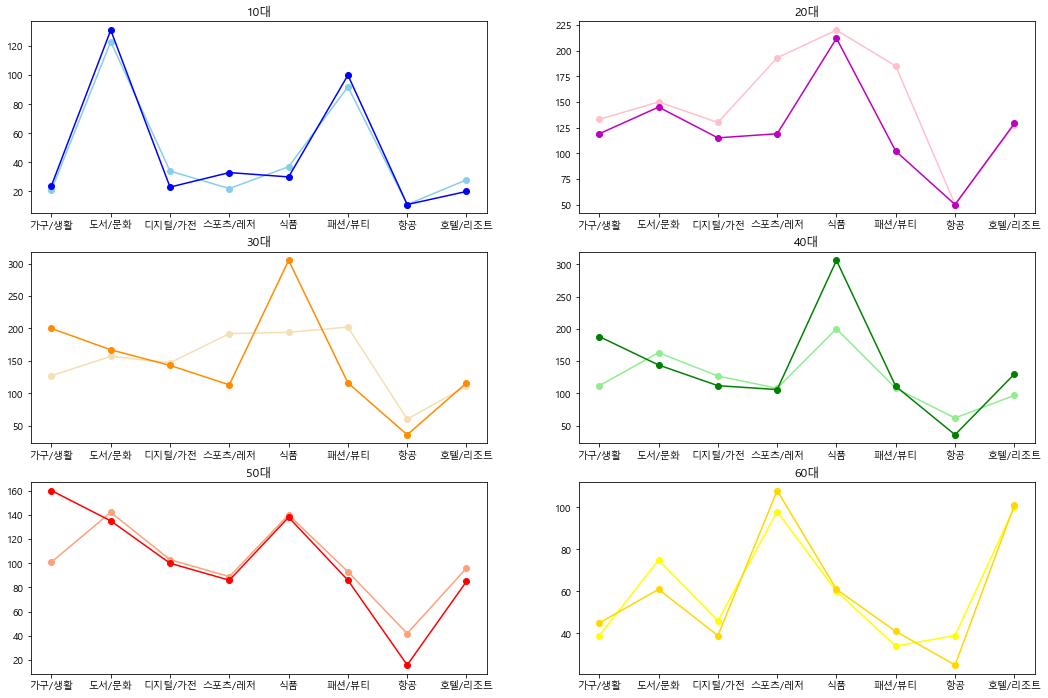

In [807]:
fig=plt.figure(figsize=(18,12))
ax1=fig.add_subplot(3,2,1)   
ax1.plot(table7['10대'], marker='o', color='skyblue')
ax1.plot(table8['10대'], marker='o', color='blue')
ax1.set_title('10대')

ax2=fig.add_subplot(3,2,2)   
ax2.plot(table7['20대'], marker='o', color='pink')
ax2.plot(table8['20대'], marker='o', color='m')
ax2.set_title('20대')

ax2=fig.add_subplot(3,2,3)   
ax2.plot(table7['30대'], marker='o', color='wheat')
ax2.plot(table8['30대'], marker='o', color='darkorange')
ax2.set_title('30대')

ax2=fig.add_subplot(3,2,4)   
ax2.plot(table7['40대'], marker='o', color='lightgreen')
ax2.plot(table8['40대'], marker='o', color='green')
ax2.set_title('40대')

ax2=fig.add_subplot(3,2,5)   
ax2.plot(table7['50대'], marker='o', color='lightsalmon')
ax2.plot(table8['50대'], marker='o', color='red')
ax2.set_title('50대')

ax2=fig.add_subplot(3,2,6)   
ax2.plot(table7['60대'], marker='o', color='yellow')
ax2.plot(table8['60대'], marker='o', color='gold')
ax2.set_title('60대')

In [808]:
#연도별/연령대별/성별 구매횟수 차이 확인하기

table9=pd.crosstab(index=df.loc[df['year']==2020].detail_product,
                                   columns=[df[df['year']==2020].age_c,df[df['year']==2020].gender])
table10=pd.crosstab(index=df.loc[df['year']==2021].detail_product,
                                   columns=[df[df['year']==2021].age_c,df[df['year']==2021].gender])
table11=table10-table9
table11

age_c             10대         20대         30대         40대         50대       \
gender         female male female male female male female male female male   
detail_product                                                               
가구/생활               0    3     -8   -6     23   50     43   33     32   27   
도서/문화               0    8     -9    4     -6   16     -9  -10      3  -10   
디지털/가전            -11    0     -8   -7    -17   13     -6   -9     -5    2   
스포츠/레저              9    2     -2  -72     -7  -72      0   -2     17  -20   
식품                  1   -8      6  -14    106    5    102    4    -15   13   
패션/뷰티              14   -6    -76   -7    -74  -12     -5    8    -14    7   
항공                  0    0     -6    6     -9  -15     -9  -17     -9  -17   
호텔/리조트             -4   -4      2   -1    -10   15      3   30     -5   -6   

age_c             60대       
gender         female male  
detail_product              
가구/생활               6    0  
도서/문화              -7   -7  
디지털/가전            -10    3  
스포츠/레저              2    8  
식품                  2   -1  
패션/뷰티               9   -2  
항공                 -8   -6  
호텔/리조트             14  -13

Text(0.5, 1.0, '40대 남성 구매 변화')

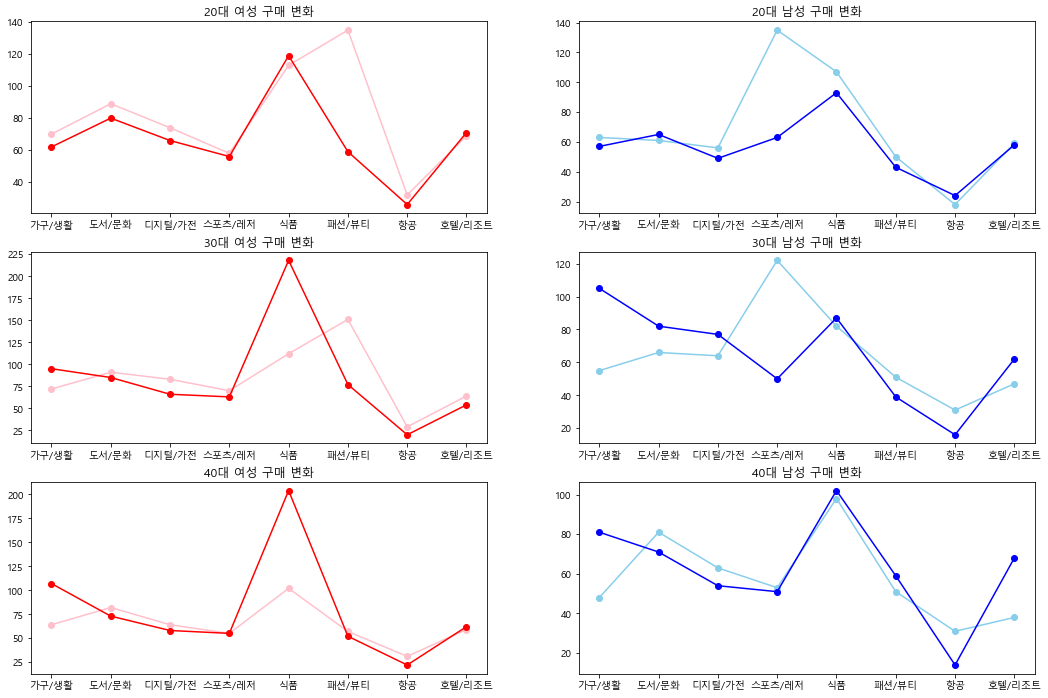

In [809]:
# 연도별/연령대별/성별 구매횟수 차이  
# 20,30,40대만 시각화

fig=plt.figure(figsize=(18,12))
ax1=fig.add_subplot(3,2,1)   
ax1.plot(table9['20대']['female'], marker='o', color='pink')
ax1.plot(table10['20대']['female'], marker='o', color='red')
ax1.set_title('20대 여성 구매 변화')

ax1=fig.add_subplot(3,2,2)   
ax1.plot(table9['20대']['male'], marker='o', color='skyblue')
ax1.plot(table10['20대']['male'], marker='o', color='blue')
ax1.set_title('20대 남성 구매 변화')

ax1=fig.add_subplot(3,2,3)   
ax1.plot(table9['30대']['female'], marker='o', color='pink')
ax1.plot(table10['30대']['female'], marker='o', color='red')
ax1.set_title('30대 여성 구매 변화')

ax1=fig.add_subplot(3,2,4)   
ax1.plot(table9['30대']['male'], marker='o', color='skyblue')
ax1.plot(table10['30대']['male'], marker='o', color='blue')
ax1.set_title('30대 남성 구매 변화')

ax1=fig.add_subplot(3,2,5)   
ax1.plot(table9['40대']['female'], marker='o', color='pink')
ax1.plot(table10['40대']['female'], marker='o', color='red')
ax1.set_title('40대 여성 구매 변화')

ax1=fig.add_subplot(3,2,6)   
ax1.plot(table9['40대']['male'], marker='o', color='skyblue')
ax1.plot(table10['40대']['male'], marker='o', color='blue')
ax1.set_title('40대 남성 구매 변화')



- 20대 여성은 패션/뷰티가 대폭 감소,
- 30대,40대 여성은 식품이 대폭 증가
- 20대,30대 남성은 스포츠/레저가 대폭 감소한 것을 알 수 있음

코로나로 인해 외식이 아닌 집밥 수요가 늘어나서 식품 구매율이 증가, 장기적으로 마스크착용을 실시함으로서 패션/뷰티, 스포츠/레저 시장 구매율이 하락한 것으로 보임

<img src='전체기사.png' width='800px'>

In [810]:
#그렇다면 고객들이 현재 진행중인 이벤트들을 참여하고 있는지, 이벤트를 알게된 주요 유입경로는 어딘지 확인해보자

#배경: 첫구매 할인은 20년도부터 진행, 쿠팡플레이와 연계하는 쿠팡멤버쉽 할인은 21년도부터 진행



#연도별 이벤트 참여 유무

pd.options.display.float_format = '{:.2f}'.format   
pd.pivot_table(df,
                     index=['year'],
                    columns='event',
                     values='amount',
                     aggfunc=['count'])

#2021년도 첫구매 할인을 이용한 고객 수가 적고, 쿠팡멤버쉽 할인을 적용한 고객수는 증가함
#쿠팡멤버쉽 이용이 증가했으나 총 구매율이 감소한 것을 보니 큰 효과는 없었음.

count        
event 첫구매 할인  쿠팡 멤버쉽
year                
2020  328.00     NaN
2021     NaN 1807.00

In [811]:
print('전체 고객 수: '+str(len(table4['cusno'].unique()))+'명')

print('2021년도 새로 유입된 고객 수: '+str(table4['welcome'].sum())+'명')

print('2021년도 이탈 고객 수: '+str(table4['leave'].sum())+'명')

#21년도 첫구매 할인이 적은 이유는 1000명 가량의 고객 중 유입된 고객 수가 00명 뿐이었기 때문
#21년도에 이탈한 고객수는 27명으로 유입된 고객들은  이탈할 확률이 적음

#따라서 구매율을 높이기 위해 첫구매할인을 통해 유입 고객수를 늘리는 방향으로 다음 마케팅을 진행하자

전체 고객 수: 996명
2021년도 새로 유입된 고객 수: 27명
2021년도 이탈 고객 수: 33명


In [812]:
#그렇다면 첫구매할인 이벤트를 사용했던 고객들의 주요 유입경로는 어딘지 살펴보자

pd.pivot_table(df,
              index=['year','funnels'],
              columns='event',
              values='amount',
              aggfunc=['count'])

#sns 홍보사이트가 가장 많음. 따라서, 고객 유입을 위해 첫구매할인 이벤트의 sns홍보량을 늘리자는 결론을 내림

count       
event          첫구매 할인 쿠팡 멤버쉽
year funnels                
2020 sns 홍보사이트 249.00    NaN
     가격비교 사이트   30.00    NaN
     온라인사이트     27.00    NaN
     쿠팡 어플      22.00    NaN
2021 sns 홍보사이트    NaN 494.00
     가격비교 사이트     NaN 476.00
     온라인사이트       NaN 408.00
     쿠팡 어플        NaN 429.00

## 구매 감소 예측 모델

In [813]:
#새로운 변수 넣기전 모델링
from sklearn.preprocessing import LabelEncoder


table11=table4.copy()

table12=table11[['sales','cusno','gender','age_c','count_df','amount_df','amount_df_per',
                 'product_10','product_20','product_30', 'event_첫구매할인','event_쿠팡멤버쉽',
                  'leave','welcome']]
table12=table12.replace([np.inf, -np.inf],0)

table12.head()

,sales,cusno,gender,age_c,count_df,amount_df,amount_df_per,product_10,product_20,product_30,event_첫구매할인,event_쿠팡멤버쉽,leave,welcome
0,0,1001.00,female,20대,0,-3663208.47,-1.74,1,-1,0,0,2,0,0
1,0,1002.00,female,10대,-6,-9011829.15,-4.42,-1,-4,-1,0,0,0,0
2,1,1003.00,female,20대,-1,388155.29,0.09,0,1,-2,1,3,0,0
3,1,1004.00,male,30대,2,11200692.41,0.51,-1,3,0,0,6,0,0
4,0,1005.00,female,40대,-5,-6449760.47,-2.62,-1,-2,-2,1,4,0,0


In [814]:
#변수 간 상관성 확인
table12.corr()

#연도별 구매횟수 차이, 연도별  구매액 차이가 상관성이 높음
#첫구매할인 이용여부, 이탈여부, 유입여부 역시 어느정도 상관성은 있어보임

,sales,cusno,count_df,amount_df,amount_df_per,product_10,product_20,product_30,event_첫구매할인,event_쿠팡멤버쉽,leave,welcome
sales,1.00,0.00,0.59,0.77,0.10,0.30,0.50,0.11,-0.07,-0.08,0.17,-0.18
cusno,0.00,1.00,-0.07,-0.03,-0.01,-0.01,-0.04,-0.06,0.03,0.04,-0.01,-0.01
count_df,0.59,-0.07,1.00,0.73,0.10,0.44,0.57,0.57,-0.08,-0.26,0.19,-0.17
amount_df,0.77,-0.03,0.73,1.00,0.13,0.39,0.64,0.15,-0.08,-0.08,0.11,-0.15
amount_df_per,0.10,-0.01,0.10,0.13,1.00,0.09,0.10,-0.01,0.04,0.04,0.02,0.01
product_10,0.30,-0.01,0.44,0.39,0.09,1.00,-0.04,-0.03,-0.05,-0.08,-0.01,-0.01
product_20,0.50,-0.04,0.57,0.64,0.10,-0.04,1.00,-0.06,-0.09,-0.05,-0.01,-0.01
product_30,0.11,-0.06,0.57,0.15,-0.01,-0.03,-0.06,1.00,0.00,-0.30,0.02,0.02
event_첫구매할인,-0.07,0.03,-0.08,-0.08,0.04,-0.05,-0.09,0.00,1.00,0.24,-0.12,-0.12
event_쿠팡멤버쉽,-0.08,0.04,-0.26,-0.08,0.04,-0.08,-0.05,-0.30,0.24,1.00,-0.15,-0.13


In [815]:
#성별, 연령별 평균 구매감소율

a=pd.pivot_table(table12,
              columns=['gender','age_c'],
              values='sales',
              aggfunc='mean')
a

#연령별로 조금씩 차이가나는걸로 보아 상관성 있어보임

gender female                          male                         
age_c     10대  20대  30대  40대  50대  60대  10대  20대  30대  40대  50대  60대
sales    0.48 0.61 0.60 0.44 0.51 0.53 0.57 0.67 0.54 0.51 0.52 0.53

In [816]:
#모델링하기 위해 인코딩해보자

le=LabelEncoder()
table12['gender']=le.fit_transform(table12[['gender']])
table12['age_c']=le.fit_transform(table12[['age_c']])
table12.head()

,sales,cusno,gender,age_c,count_df,amount_df,amount_df_per,product_10,product_20,product_30,event_첫구매할인,event_쿠팡멤버쉽,leave,welcome
0,0,1001.00,0,1,0,-3663208.47,-1.74,1,-1,0,0,2,0,0
1,0,1002.00,0,0,-6,-9011829.15,-4.42,-1,-4,-1,0,0,0,0
2,1,1003.00,0,1,-1,388155.29,0.09,0,1,-2,1,3,0,0
3,1,1004.00,1,2,2,11200692.41,0.51,-1,3,0,0,6,0,0
4,0,1005.00,0,3,-5,-6449760.47,-2.62,-1,-2,-2,1,4,0,0


In [817]:
#NULL갑 확인

table12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales          996 non-null    int32  
 1   cusno          996 non-null    float64
 2   gender         996 non-null    int32  
 3   age_c          996 non-null    int32  
 4   count_df       996 non-null    int32  
 5   amount_df      996 non-null    float64
 6   amount_df_per  996 non-null    float64
 7   product_10     996 non-null    int32  
 8   product_20     996 non-null    int32  
 9   product_30     996 non-null    int32  
 10  event_첫구매할인    996 non-null    int32  
 11  event_쿠팡멤버쉽    996 non-null    int32  
 12  leave          996 non-null    int32  
 13  welcome        996 non-null    int32  
dtypes: float64(3), int32(11)
memory usage: 66.3 KB


### 모델링 평가

In [818]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#독립변수, 종속변수 분리: 위에서 상관성이 언급된 변수들로 구성
X = table12[['gender','age_c','count_df','amount_df','amount_df_per','product_10','product_20','product_30','leave','welcome']]
y = table12['sales']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 
print(X_train.shape)
print(X_test.shape)

(796, 10)
(200, 10)


In [819]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

[0 0 1 0 0 0 1 0 0 1]
[0 0 1 0 0 0 1 0 0 1]
dt 예측 정확도 : 1.0


In [820]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.995


In [821]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)


lr 예측 정확도 : 1.0


In [822]:
#변수추가해봄

In [823]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#독립변수, 종속변수 분리(변수는 바꿔도 됨!)
X = table12[['gender','age_c','count_df','amount_df','product_10','product_20','product_30', 'event_첫구매할인','event_쿠팡멤버쉽',
              'leave','welcome']]
y = table12['sales']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 
print(X_train.shape)
print(X_test.shape)

(796, 11)
(200, 11)


In [824]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

[0 0 1 0 0 0 1 0 0 1]
[0 0 1 0 0 0 1 0 0 1]
dt 예측 정확도 : 1.0


In [825]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.995


In [826]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)


lr 예측 정확도 : 1.0


### 다중회귀분석

In [827]:
table13=table4.copy()
table13=table13.replace([np.inf, -np.inf],[1,-1])

#(20-21)구매량/20년도구매량
#20년도 자료가 없는 경우: inf
#21년도 자료가 없는 경우: 

In [828]:
table13.corr()['amount_df_per']

cusno           -0.01
count_2020       0.10
count_2021      -0.01
amount_2020      0.11
amount_2021     -0.03
product_10       0.09
product_20       0.10
product_30      -0.01
event_첫구매할인      0.04
event_쿠팡멤버쉽      0.05
count_df         0.10
amount_df        0.13
amount_df_per    1.00
sales            0.11
leave            0.02
welcome          0.01
Name: amount_df_per, dtype: float64

In [829]:
#모델링하기 위해 인코딩해보자

le=LabelEncoder()
table13['gender']=le.fit_transform(table13[['gender']])
table13['age_c']=le.fit_transform(table13[['age_c']])
table13.head()

,cusno,gender,age_c,count_2020,count_2021,amount_2020,amount_2021,product_10,product_20,product_30,event_첫구매할인,event_쿠팡멤버쉽,count_df,amount_df,amount_df_per,sales,leave,welcome
0,1001.00,0,1,3,3,2109081.63,5772290.10,1,-1,0,0,2,0,-3663208.47,-1.74,0,0,0
1,1002.00,0,0,1,7,2040915.60,11052744.75,-1,-4,-1,0,0,-6,-9011829.15,-4.42,0,0,0
2,1003.00,0,1,3,4,4233464.40,3845309.11,0,1,-2,1,3,-1,388155.29,0.09,1,0,0
3,1004.00,1,2,11,9,21753012.58,10552320.17,-1,3,0,0,6,2,11200692.41,0.51,1,0,0
4,1005.00,0,3,2,7,2461810.22,8911570.69,-1,-2,-2,1,4,-5,-6449760.47,-2.62,0,0,0


In [830]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#독립변수, 종속변수 분리: 위에서 상관성이 언급된 변수들로 구성
X = table13[['gender','age_c','count_df','amount_df','product_10','product_20','product_30']]
y = table13['amount_df_per']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 
print(X_train.shape)
print(X_test.shape)

(796, 7)
(200, 7)


In [831]:
from sklearn.linear_model import LinearRegression

mlr_model= LinearRegression()
mlr_model.fit(X_train, y_train) 
mlr_pred = mlr_model.predict(X_test)

# mlr_accuracy = mlr_model.score(X_train,y_train)
# print('lr 예측 정확도 :', mlr_accuracy)
mlr_accuracy = mlr_model.score(X_test,y_test)
print('lr 예측 정확도 :', mlr_accuracy)

lr 예측 정확도 : -2.4647724181897925
